In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pi = pd.read_csv('wFB_vFA(pi)_FA-Z(pi).csv')

In [3]:
run_value = pd.read_csv('run_value.csv')

In [4]:
run_value.columns

Index(['Season', 'Name', 'Team', 'wFA (pi)', 'playerid'], dtype='object')

In [5]:
run_value = run_value.drop(columns = ['Team'])

In [6]:
run_value = run_value.rename(columns={'wFA (pi)':'wFA'})

In [7]:
run_value.columns

Index(['Season', 'Name', 'wFA', 'playerid'], dtype='object')

In [8]:
pi.corr()

,Season,wFB,FA-Z (pi),vFA (pi),playerid
Season,1.000000,0.080897,-0.006773,0.121810,0.430290
wFB,0.080897,1.000000,0.150614,0.238832,0.086997
FA-Z (pi),-0.006773,0.150614,1.000000,0.129383,-0.045878
vFA (pi),0.121810,0.238832,0.129383,1.000000,0.306178
playerid,0.430290,0.086997,-0.045878,0.306178,1.000000


In [9]:
pi.columns

Index(['Season', 'Name', 'Team', 'wFB', 'FA-Z (pi)', 'vFA (pi)', 'playerid'], dtype='object')

In [10]:
pi = pi.rename(columns={'FA-Z (pi)':'FAZ', 'vFA (pi)':'vFA'})

In [11]:
pi_names = pi.Name

In [12]:
pi = pi.drop(columns=['Name', 'Team'])

In [13]:
pi.columns

Index(['Season', 'wFB', 'FAZ', 'vFA', 'playerid'], dtype='object')

In [14]:
pi_names.head(5)

0    Shane Bieber
1    Zack Greinke
2    Jacob deGrom
3    Trevor Bauer
4    Jake Arrieta
Name: Name, dtype: object

In [15]:
pi = pi.astype(float)

In [16]:
pitch_value = (pi.FAZ * pi.vFA) / 100
print(pitch_value)

0      9.0528
1      8.2147
2      8.0892
3      9.8385
4      7.5840
        ...  
403    7.1071
404    7.2072
405    7.2960
406    7.3075
407    6.7087
Length: 408, dtype: float64


In [17]:
vfa_std = np.std(pi.vFA)
print(vfa_std)

2.636184074353517


In [18]:
vfa_variance = np.var(pi.vFA)
print(vfa_variance)

6.94946647387511


In [19]:
vfa_90_percentile = np.nanpercentile(pi.vFA, 90)
print(vfa_90_percentile)

# Need to use nan version for some reason but hey it works

96.0


In [20]:
vfa_sub_90mph_percentile = np.nanpercentile(pi.vFA, 12)
print(vfa_sub_90mph_percentile)
# This basically says that only about 12% percent of MLB players have an AVG fastball velocity below 90 MPH

89.9


<function matplotlib.pyplot.show(close=None, block=None)>

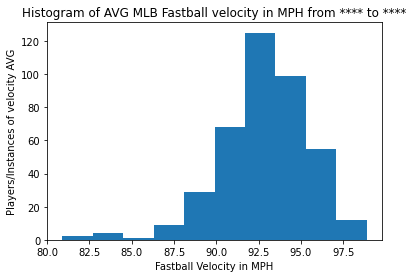

In [21]:
x = np.array(pi.vFA)
plt.hist(x, 10)
plt.title('Histogram of AVG MLB Fastball velocity in MPH from **** to ****')
plt.xlabel('Fastball Velocity in MPH')
plt.ylabel('Players/Instances of velocity AVG')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

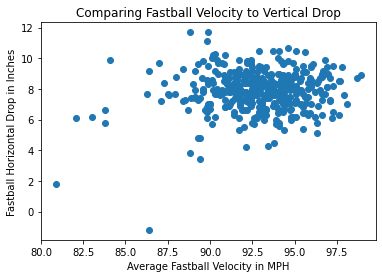

In [17]:
x = pi.vFA
y = pi.FAZ

plt.scatter(x, y)
plt.title('Comparing Fastball Velocity to Vertical Drop')
plt.xlabel('Average Fastball Velocity in MPH')
plt.ylabel('Fastball Horizontal Drop in Inches')
plt.show

In [28]:
area = pi.vFA * pi.FAZ
print(area)

0      905.28
1      821.47
2      808.92
3      983.85
4      758.40
        ...  
403    710.71
404    720.72
405    729.60
406    730.75
407    670.87
Length: 408, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

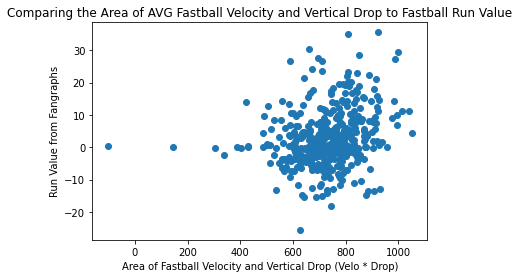

In [36]:
x = area
y = run_value.wFA

plt.scatter(x, y)
plt.title('Comparing the Area of AVG Fastball Velocity and Vertical Drop to Fastball Run Value')
plt.xlabel('Area of Fastball Velocity and Vertical Drop (Velo * Drop)')
plt.ylabel('Run Value from Fangraphs')
plt.show